<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>imports</a></span></li></ul></li><li><span><a href="#The-consumer-problem" data-toc-modified-id="The-consumer-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The consumer problem</a></span></li><li><span><a href="#Utility-function" data-toc-modified-id="Utility-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Utility function</a></span><ul class="toc-item"><li><span><a href="#Print-to-screen" data-toc-modified-id="Print-to-screen-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Print to screen</a></span></li><li><span><a href="#Print-to-disc" data-toc-modified-id="Print-to-disc-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Print to disc</a></span></li><li><span><a href="#Plot-utility-function" data-toc-modified-id="Plot-utility-function-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot utility function</a></span></li></ul></li><li><span><a href="#Algorithm-1:-Simple-loop" data-toc-modified-id="Algorithm-1:-Simple-loop-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Algorithm 1: Simple loop</a></span></li><li><span><a href="#Algorithm-2:-Use-monotonicity" data-toc-modified-id="Algorithm-2:-Use-monotonicity-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Algorithm 2: Use monotonicity</a></span></li><li><span><a href="#Algorithm-3:-Call-a-solver" data-toc-modified-id="Algorithm-3:-Call-a-solver-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Algorithm 3: Call a solver</a></span></li><li><span><a href="#Indifference-curves" data-toc-modified-id="Indifference-curves-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Indifference curves</a></span></li><li><span><a href="#A-class-based-solution" data-toc-modified-id="A-class-based-solution-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>A class based solution</a></span><ul class="toc-item"><li><span><a href="#Test-with-Jeppe" data-toc-modified-id="Test-with-Jeppe-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Test with Jeppe</a></span></li><li><span><a href="#Example-with-Mette" data-toc-modified-id="Example-with-Mette-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Example with Mette</a></span></li></ul></li><li><span><a href="#Saving-and-loading" data-toc-modified-id="Saving-and-loading-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Saving and loading</a></span><ul class="toc-item"><li><span><a href="#Pickling" data-toc-modified-id="Pickling-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Pickling</a></span></li><li><span><a href="#Saving/loading-numpy-arrays" data-toc-modified-id="Saving/loading-numpy-arrays-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Saving/loading numpy arrays</a></span></li></ul></li><li><span><a href="#Export-to-HTML" data-toc-modified-id="Export-to-HTML-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Export to HTML</a></span></li></ul></div>

# Summary

You will learn how solve simple numerical optimization problems (**scipy.optimize**) and report the results both in text (**print**) and in figures (**matplotlib**). You will learn how to save your results for later use (**pickle**).

**Links**:

- **print**: [examples](https://www.python-course.eu/python3_formatted_output.php) (very detailed)
- **matplotlib**: [examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py), [documentation](https://matplotlib.org/users/index.html)
- **scipy-optimize**: [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html)
- **pickle**: [turtorial](https://www.datacamp.com/community/tutorials/pickle-python-tutorial)

## imports

In [1]:
import numpy as np
from scipy import optimize # package with numerical optimizers and equation solvers
import pickle # package for saving and loading objects

# for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3d plots
from matplotlib import cm # for colormaps

# magic
%matplotlib inline

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:5000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# The consumer problem

Consider the following 2-good consumer problem with utility funciton, $u(x_1,x_2)$, exogenous income $I$, and price-vector $(p_1,p_2)$,

$$
\begin{eqnarray*}
V(p_{1},p_{2},I) & = & \max_{x_{1},x_{2}}u(x_{1},x_{2})\\
 & \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq & I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq & 0
\end{eqnarray*}
$$

Let the utility function be the Cobb-Douglas utility function,

$$
u(x_1,x_2) = x_1^{\alpha}x_2^{1-\alpha}
$$

We then know the solution is

$$
\begin{eqnarray*}
x_1^{\ast} &=& \alpha \frac{I}{p_1} \\
x_2^{\ast} &=& (1-\alpha) \frac{I}{p_2}
\end{eqnarray*}
$$

# Utility function

Define the utility function

In [1]:
def u_func(x1,x2,alpha):
    return x1**alpha*x2**(1-alpha)

## Print to screen

Print a single evaluation of the utility function

In [2]:
x1 = 1
x2 = 3
u = u_func(x1,x2,alpha=0.25)

# f'text' is called a "formatted string"
# {x1:.3f} prints variable x1 as floating point number with 3 decimals

print(f'x1 = {x1:.3f}, x2 = {x2:.3f} -> u = {u:.3f}') 

x1 = 1.000, x2 = 3.000 -> u = 2.280


Print multiple evaluations of the utility function

In [3]:
x1_list = [1,2,3,4,5,6,7,8,9,10,11]
x2 = 3

for x1 in x1_list: # loop through each element in x1_list
    u = u_func(x1,x2,alpha=0.25)
    print(f'x1 = {x1:.3f}, x2 = {x2:.3f} -> u = {u:.3f}')

x1 = 1.000, x2 = 3.000 -> u = 2.280
x1 = 2.000, x2 = 3.000 -> u = 2.711
x1 = 3.000, x2 = 3.000 -> u = 3.000
x1 = 4.000, x2 = 3.000 -> u = 3.224
x1 = 5.000, x2 = 3.000 -> u = 3.409
x1 = 6.000, x2 = 3.000 -> u = 3.568
x1 = 7.000, x2 = 3.000 -> u = 3.708
x1 = 8.000, x2 = 3.000 -> u = 3.834
x1 = 9.000, x2 = 3.000 -> u = 3.948
x1 = 10.000, x2 = 3.000 -> u = 4.054
x1 = 11.000, x2 = 3.000 -> u = 4.151


And a little nicer...

In [4]:
for i, x1 in enumerate(x1_list): # i is a counter
    u = u_func(x1,x2,alpha=0.25)
    print(f'{i:2d}: x1 = {x1:<6.3f} x2 = {x2:<6.3f} -> u = {u:<6.3f}')
    
# {i:2d} prints integer i with a width of 2 (right-aligned)
# {x1:<6.3f} print floating point number x1 with a width of 6 and 3 decimals (<, left-aligned)

 0: x1 = 1.000  x2 = 3.000  -> u = 2.280 
 1: x1 = 2.000  x2 = 3.000  -> u = 2.711 
 2: x1 = 3.000  x2 = 3.000  -> u = 3.000 
 3: x1 = 4.000  x2 = 3.000  -> u = 3.224 
 4: x1 = 5.000  x2 = 3.000  -> u = 3.409 
 5: x1 = 6.000  x2 = 3.000  -> u = 3.568 
 6: x1 = 7.000  x2 = 3.000  -> u = 3.708 
 7: x1 = 8.000  x2 = 3.000  -> u = 3.834 
 8: x1 = 9.000  x2 = 3.000  -> u = 3.948 
 9: x1 = 10.000 x2 = 3.000  -> u = 4.054 
10: x1 = 11.000 x2 = 3.000  -> u = 4.151 


**Task**: Print multiple evaluations of the utility function for $x_1 = 4$ and $x_2 \in {1,2,..10}$. Control the formatting such that the 4th line is:

    3 : x1 =  4.0000 x2 =  4.0000 -> u = 4.0000

In [7]:
#fillin

x1 = 4
x2_list = [1,2,3,4,5,6,7,8,9,10,11]
for i, x2 in enumerate(x2_list):
    u = u_func(x1,x2,alpha=0.25)
    print(f'{i:<2d}: x1 = {x1:7.4f} x2 = {x2:7.4f} -> u = {u:<7.4f}')

0 : x1 =  4.0000 x2 =  1.0000 -> u = 1.4142 
1 : x1 =  4.0000 x2 =  2.0000 -> u = 2.3784 
2 : x1 =  4.0000 x2 =  3.0000 -> u = 3.2237 
3 : x1 =  4.0000 x2 =  4.0000 -> u = 4.0000 
4 : x1 =  4.0000 x2 =  5.0000 -> u = 4.7287 
5 : x1 =  4.0000 x2 =  6.0000 -> u = 5.4216 
6 : x1 =  4.0000 x2 =  7.0000 -> u = 6.0861 
7 : x1 =  4.0000 x2 =  8.0000 -> u = 6.7272 
8 : x1 =  4.0000 x2 =  9.0000 -> u = 7.3485 
9 : x1 =  4.0000 x2 = 10.0000 -> u = 7.9527 
10: x1 =  4.0000 x2 = 11.0000 -> u = 8.5420 


## Print to disc

Open a text-file and write lines in it

In [8]:
with open('somefile.txt', 'w') as the_file:
    for i, x1 in enumerate(x1_list):
        u = u_func(x1,x2,alpha=0.25)
        text = f'{i:2d}: x1 = {x1:<6.3f} x2 = {x2:<6.3f} -> u = {u:<6.3f}'
        the_file.write(text + '\n') # \n denotes a lineshift

# note: the with clause ensures that the file is properly closed

Open a text-file and read the lines in it and then print them

In [9]:
with open('somefile.txt', 'r') as the_file:
    lines = the_file.readlines()
    for line in lines:
        print(line,end='') # end='' removes the extra lineshift print creates

 0: x1 = 1.000  x2 = 11.000 -> u = 6.040 
 1: x1 = 2.000  x2 = 11.000 -> u = 7.183 
 2: x1 = 3.000  x2 = 11.000 -> u = 7.949 
 3: x1 = 4.000  x2 = 11.000 -> u = 8.542 
 4: x1 = 5.000  x2 = 11.000 -> u = 9.032 
 5: x1 = 6.000  x2 = 11.000 -> u = 9.453 
 6: x1 = 7.000  x2 = 11.000 -> u = 9.825 
 7: x1 = 8.000  x2 = 11.000 -> u = 10.158
 8: x1 = 9.000  x2 = 11.000 -> u = 10.462
 9: x1 = 10.000 x2 = 11.000 -> u = 10.741
10: x1 = 11.000 x2 = 11.000 -> u = 11.000


## Plot utility function

Calculate the utility function on a 2-dimensional grid with $N$ elements in each dimension

In [10]:
# a. settings
N = 100 # number of elements
x_max = 10 # maximum value

# b. allocate numpy arrays
shape_tuple = (N,N)
x1_values = np.empty(shape_tuple) # allocate 2d numpy array with shape=(N,N)
x2_values = np.empty(shape_tuple)
u_values = np.empty(shape_tuple)

# c. fill numpy arrays
for i in range(N): # 0,1,...,N-1
    for j in range(N): # 0,1,...,N-1
        x1_values[i,j] = (i/(N-1))*x_max # i/(N-1) is an increasing number in [0,1]
        x2_values[i,j] = (j/(N-1))*x_max # j/(N-1) is an increasing number in [0,1]
        u_values[i,j] = u_func(x1_values[i,j],x2_values[i,j],alpha=0.25)

Construct the actual plot

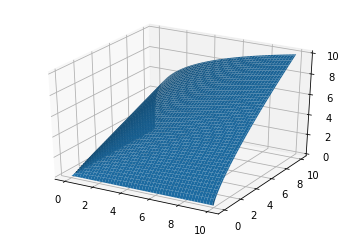

In [11]:
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d axis in the figure 
ax.plot_surface(x1_values,x2_values,u_values); # create surface plot in the axis

# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

Use a colomap, make it pretier, and save to disc

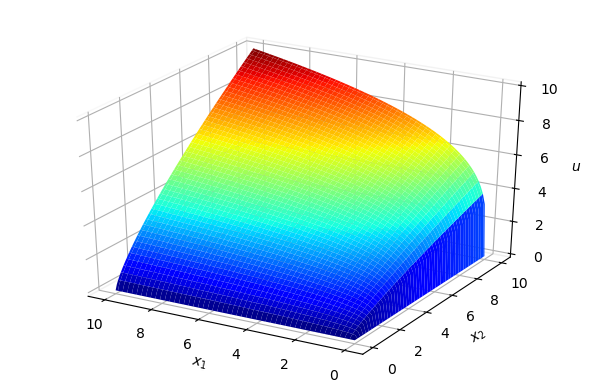

In [12]:
# a. actual plot
fig = plt.figure(figsize=(6,4),dpi=100) # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# c. invert xaxis
ax.invert_xaxis()

# d. remove background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# e. save
fig.tight_layout()
fig.savefig('someplot.pdf')

**Task**: Construct the following plot:
![wireframeplot](someplot_wireframe.png)

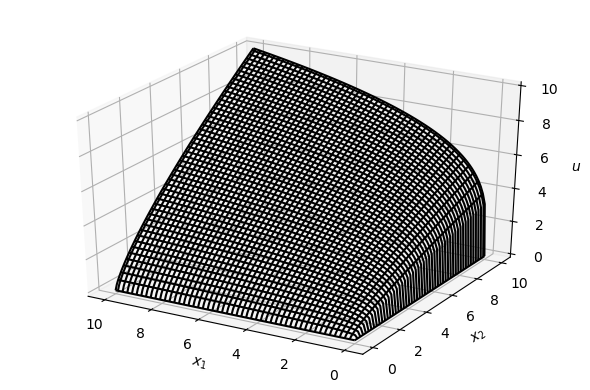

In [13]:
#fillin

# a. actual plot
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(x1_values,x2_values,u_values,edgecolor='black')

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# c. invert xaxis
ax.invert_xaxis()

# e. save
fig.tight_layout()
fig.savefig('someplot_wireframe.png')
fig.savefig('someplot_wireframe.pdf')

# Algorithm 1: Simple loop

**Idea:** Loop through a grid of $N_1 \times N_2$ possible solutions. This is the same as solving:

$$
\begin{eqnarray*}
V(p_{1},p_{2},I) & = & \max_{x_{1}\in X_1,x_{2} \in X_2} x_1^{\alpha}x_2^{1-\alpha}\\
 & \text{s.t.}\\
 X_1 & = & \left\{0,\frac{1}{N_1-1}\frac{I}{p_1},\frac{2}{N_1-1}\frac{I}{p_1},\dots,\frac{I}{p_1}\right\} \\
 X_2 & = & \left\{0,\frac{1}{N_2-1}\frac{I}{p_2},\frac{2}{N_2-1}\frac{ I}{p_2},\dots,\frac{ I}{p_2}\right\} \\
p_{1}x_{1}+p_{2}x_{2} & \leq & I\\
\end{eqnarray*}
$$

Function doing just this

In [14]:
def find_best_choice(alpha,I,p1,p2,N1,N2,do_print=True):
    
    # a. allocate numpy arrays
    shape_tuple = (N1,N2)
    x1_values = np.empty(shape_tuple)
    x2_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # b. start from guess of x1=x2=0
    x1_best = 0
    x2_best = 0
    u_best = u_func(0,0,alpha)
    
    # c. loop through all possibilities
    for i in range(N1):
        for j in range(N2):
            
            # i. x1 and x2 (chained assignment)
            x1_values[i,j] = x1 = (i/(N1-1))*I/p1
            x2_values[i,j] = x2 = (j/(N2-1))*I/p2
            
            # ii. utility
            if p1*x1+p2*x2 <= I: # u(x1,x2) if spending <= income 
                u_values[i,j] = u_func(x1,x2,alpha)
            else: # u(0,0) if spending > income
                u_values[i,j] = u_func(0,0,alpha)
            
            # iii. check if best sofar
            if u_values[i,j] > u_best:    
                x1_best = x1_values[i,j]
                x2_best = x2_values[i,j] 
                u_best = u_values[i,j]
    
    # d. print
    if do_print:
        print_solution(x1_best,x2_best,u_best,I,p1,p2)

    return x1_best,x2_best,u_best,x1_values,x2_values,u_values

# function for printing the solution
def print_solution(x1,x2,u,I,p1,p2):
    print(f'x1 = {x1:.8f}')
    print(f'x2 = {x2:.8f}')
    print(f'u  = {u:.8f}')
    print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.8f}') 

Call the function

In [15]:
sol = find_best_choice(alpha=0.25,I=10,p1=1,p2=2,N1=100,N2=200)

x1 = 2.52525253
x2 = 3.71859296
u  = 3.37567157
I-p1*x1-p2*x2 = 0.03756155


Plot the solution

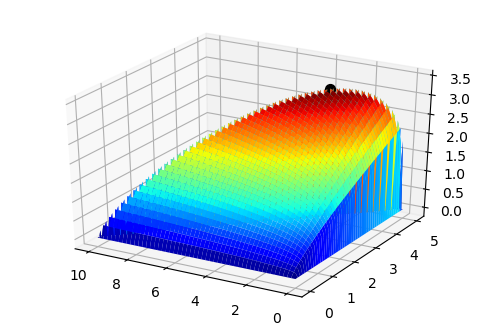

In [16]:
# a. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol

# b. setup figure
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1,projection='3d')

# c. plot 3d surface of utility values for different choices
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)
ax.invert_xaxis()

# d. plot optimal choice
ax.scatter(x1_best,x2_best,u_best,s=50,color='black');

**Task**: Can you find a better solution with higher utility and lower left-over income, $I-p_1 x_1-p_2 x_2$?

In [17]:
#fillin

sol = find_best_choice(alpha=0.25,I=10,p1=1,p2=2,N1=1000,N2=1000)

x1 = 2.50250250
x2 = 3.74874875
u  = 3.38850695
I-p1*x1-p2*x2 = 0.00000000


# Algorithm 2: Use monotonicity

**Idea:** Loop through a grid of $N$ possible solutions for $x_1$ and assume the remainder is spent on $x_2$. This is the same as solving:

$$
\begin{eqnarray*}
V(p_{1},p_{2},I) & = & \max_{x_{1}\in X_1} x_1^{\alpha}x_2^{1-\alpha}\\
 & \text{s.t.}\\
 X_1 & = & \left\{0,\frac{1}{N-1}\frac{\alpha I}{p_1},\frac{2}{N-1}\frac{\alpha I}{p_1},\dots,\frac{\alpha I}{p_1}\right\} \\
x_{2} & = & \frac{I-p_{1}x_{1}}{p_2}\\
\end{eqnarray*}
$$

Function doing just this:

In [18]:
def find_best_choice_monotone(alpha,I,p1,p2,N,do_print=True):
    
    # a. allocate numpy arrays
    shape_tuple = (N)
    x1_values = np.empty(shape_tuple)
    x2_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # b. start from guess of x1=x2=0
    x1_best = 0
    x2_best = 0
    u_best = u_func(0,0,alpha)
    
    # c. loop through all possibilities
    for i in range(N):
        
        # i. x1
        x1_values[i] = x1 = i/(N-1)*I/p1
        
        # ii. implied x2
        x2_values[i] = x2 = (I-p1*x1)/p2
            
        # iii. utility    
        u_values[i] = u_func(x1,x2,alpha)
        
        if u_values[i] >= u_best:    
            x1_best = x1_values[i]
            x2_best = x2_values[i] 
            u_best = u_values[i]
            
    # d. print
    if do_print:
        print_solution(x1_best,x2_best,u_best,I,p1,p2)   

    return x1_best,x2_best,u_best,x1_values,x2_values,u_values

In [19]:
sol_monotone = find_best_choice_monotone(alpha=0.25,I=10,p1=1,p2=2,N=1000) 

x1 = 2.50250250
x2 = 3.74874875
u  = 3.38850695
I-p1*x1-p2*x2 = 0.00000000


Plot the solution

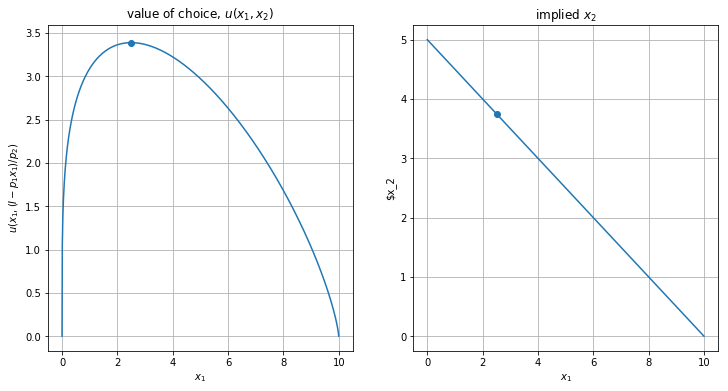

In [20]:
# a. create the figure
fig = plt.figure(figsize=(12,6))

# b. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol_monotone

# c. left plot
ax = fig.add_subplot(1,2,1)

ax.plot(x1_values,u_values)
ax.scatter(x1_best,u_best)

ax.set_title('value of choice, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,(I-p_1 x_1)/p_2)$')
ax.grid(True)

# c. right plot
ax = fig.add_subplot(1,2,2)

ax.plot(x1_values,x2_values)
ax.scatter(x1_best,x2_best)

ax.set_title('implied $x_2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2')
ax.grid(True)

# Algorithm 3: Call a solver


**Case 1**: Scalar solver using monotonicity

In [21]:
# a. parameters
alpha = 0.25
I = 10
p1 = 1
p2 = 2

# b. objective funciton (to minimize)
def value_of_choice(x1,alpha,I,p1,p2):
    x2 = (I-p1*x1)/p2
    return -u_func(x1,x2,alpha)

# c. call solver
sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',
                               bounds=(0,I/p1),args=(alpha,I,p1,p2))

# d. unpack solution
x1 = sol_case1.x
x2 = (I-p1*x1)/p2
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.50000006
x2 = 3.74999997
u  = 3.38850751
I-p1*x1-p2*x2 = 0.00000000


**Case 2**: Multi-dimensional constrained solver

In [22]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    # note: x is a vector
    x1 = x[0]
    x2 = x[1]
    return -u_func(x1,x2,alpha)

# b. constraints (violated if negative) and bounds
constraints = ({'type': 'ineq', 'fun': lambda x:  I-p1*x[0]-p2*x[1]})
bounds = ((0,I/p1),(0,I/p2))

# c. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case2 = optimize.minimize(value_of_choice,initial_guess,args=(alpha,I,p1,p2),
                        method='SLSQP',bounds=bounds,constraints=constraints)

# d. unpack solution
x1 = sol_case2.x[0]
x2 = sol_case2.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.49937952
x2 = 3.75031024
u  = 3.38850748
I-p1*x1-p2*x2 = 0.00000000


**Case 3**: Multi-dimensional unconstrained solver with constrains implemented via penalties

In [23]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    
    # i. unpack
    x1 = x[0]
    x2 = x[1]
    
    # ii. penalty
    penalty = 0
    U = p1*x1+p2*x2 # total expenses
    if U > I: # expenses > income not allowed
        fac = I/U
        x1 *= fac # force U = I
        x2 *= fac # force U = I
        penalty += 1000*(U-I) # calculate penalty
        
    return -u_func(x1,x2,alpha)

# b. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case3 = optimize.minimize(value_of_choice,initial_guess,method='Nelder-Mead',
                        args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case3.x[0]
x2 = sol_case3.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.58573053
x2 = 3.87859581
u  = 3.50470694
I-p1*x1-p2*x2 = -0.34292214


**Task:** Find the error in the code in the previous cell.

In [24]:
#fillin

# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    
    x1 = x[0]
    x2 = x[1]
    
    penalty = 0
    U = p1*x1+p2*x2
    if U > I:
        fac = I/U
        x1 *= fac
        x2 *= fac
        penalty += 1000*(U-I) 
    return -u_func(x1,x2,alpha) + penalty # the error

# b. call solver
initial_guess = [I/p1/2,I/p2/2]
sol = optimize.minimize(value_of_choice,initial_guess,method='Nelder-Mead',
                        args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case3.x[0]
x2 = sol_case3.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.58573053
x2 = 3.87859581
u  = 3.50470694
I-p1*x1-p2*x2 = -0.34292214


# Indifference curves

Remember that the indifference curve through the point $(y_1,y_2)$ is given by

$$
\big\{(x_1,x_2) \in \mathbb{R}^2_+ \,|\, u(x_1,x_2) = u(y_1,y_2)\big\}
$$

To find the indifference curve, we can fix a grid for $x_2$, and then find the corresponding $x_1$ which solves $(x_1,x_2) = u(y_1,y_2)$ for each value of $x_2$.

In [25]:
def objective(x1,x2,alpha,u):
    return u_func(x1,x2,alpha)-u # = 0 then on indifference curve with for u

def find_indifference_curve(y1,y2,alpha,N,x2_max):
    
    # a. utiltty in (y1,y2)
    u_y1y2 = u_func(y1,y2,alpha)
    
    # b. allocate numpy arrays
    x1_vec = np.empty(N)
    x2_vec = np.linspace(1e-8,x2_max,N)
    
    # c. loop through x2
    for i,x2 in enumerate(x2_vec):

        x1_guess = 0 # initial guess
        sol = optimize.root(objective, x1_guess, args=(x2,alpha,u_y1y2)) 
        # optimize.root -> solve objective = 0 starting from x1 = x2_guess
        
        x1_vec[i] = sol.x[0]
    
    return x1_vec,x2_vec

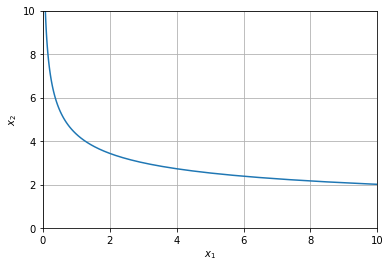

In [26]:
# a. find indifference curve through (2,2) for x2 in [0,10]
x2_max = 10
x1_vec,x2_vec = find_indifference_curve(y1=3,y2=3,alpha=0.25,N=100,x2_max=x2_max) 

# b. plot inddifference curve
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(x1_vec,x2_vec)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x2_max])
ax.set_ylim([0,x2_max])
ax.grid(True)

**Task:** Find the indifference curve through $x_1 = 15$ and $x_2 = 3$ with $\alpha = 0.5$.

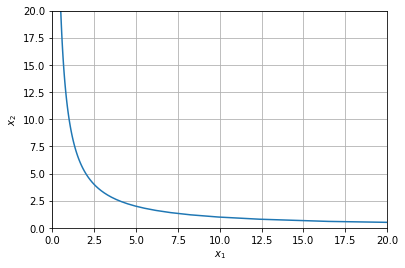

In [27]:
#fillin

x2_max = 20
x1_vec,x2_vec = find_indifference_curve(y1=5,y2=2,alpha=0.5,N=100,x2_max=x2_max) 

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,x2_vec)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x2_max])
ax.set_ylim([0,x2_max])
ax.grid(True)

# A class based solution

In [28]:
class consumer:
    
    # called when created
    def __init__(self,**kwargs):
        
        # a. baseline parameters
        self.alpha = 0.5
        
        self.p1 = 1
        self.p2 = 2
        self.I = 10
        
        self.x1 = np.nan
        self.x2 = np.nan
        
        # b. baseline settings
        self.x2_max = 10
        self.N = 100
            
        # c. update parameters and settings
        for key, value in kwargs.items():
            setattr(self,key,value) # like self.key = value
        
         # note: "kwargs" is a dictionary with keyword arguments
            
    # called when printed
    def __str__(self):
        
        lines = f'alpha = {self.alpha:.3f}\n'
        lines += f'price vector = (p1,p2) = ({self.p1:.3f},{self.p2:.3f})\n'
        lines += f'income = I = {self.I:.3f}\n'
        if not (np.isnan(self.x1) or np.isnan(self.x2)):
            lines += 'solution:\n'
            lines += f' x1 = {self.x1:.2f}\n'
            lines += f' x2 = {self.x2:.2f}\n'
               
        return lines
    
    # utilty function
    def u_func(self,x1,x2):
        return x1**self.alpha*x2**(1-self.alpha)
    
    # solve problem
    def solve(self):
        
        # a. objective function (to minimize) 
        def value_of_choice(x):
            return -u_func(x[0],x[1],self.alpha)
        
        # b. constraints
        constraints = ({'type': 'ineq', 'fun': lambda x: self.I-self.p1*x[0]-self.p2*x[1]})
        bounds = ((0,self.I/self.p1),(0,self.I/self.p2))
        
        # c. call solver
        initial_guess = [self.I/self.p1/2,self.I/self.p2/2]
        sol = optimize.minimize(value_of_choice,initial_guess,
                                method='SLSQP',bounds=bounds,constraints=constraints)
        
        # d. save
        self.x1 = sol.x[0]
        self.x2 = sol.x[1]
        self.u = u_func(self.x1,self.x2,self.alpha)
        
    # find indifference curves
    def find_indifference_curves(self):
        
        # allocate memory
        self.x1_vecs = []
        self.x2_vecs = []
        self.us = []
        
        for fac in [0.5,1,1.5]:
            
            # fac = 1 -> indifference curve through optimum
            # fac < 1 -> ... below optimum
            # fac > 1 -> ... above optimum
                
            # a. utility in (fac*x1,fac*x2)
            u = self.u_func(fac*self.x1,fac*self.x2)
            
            # b. allocate numpy arrays
            x1_vec = np.empty(self.N)
            x2_vec = np.linspace(1e-8,self.x2_max,self.N)

            # c. loop through x2 and find x1
            for i,x2 in enumerate(x2_vec):

                def objective(x1):
                    return self.u_func(x1,x2)-u
            
                sol = optimize.root(objective, 0)
                x1_vec[i] = sol.x[0]
            
            # d. save
            self.x1_vecs.append(x1_vec)
            self.x2_vecs.append(x2_vec)
            self.us.append(u)
    
    # plot budgetset
    def plot_budgetset(self,ax):
        
        x = [0,0,self.I/self.p1] # x-cordinates in triangle
        y = [0,self.I/self.p2,0] # y-cordinates in triangle
        
        # fill triangle
        ax.fill(x,y,color="firebrick",lw=2,alpha=0.5) # alpha controls transparance
        
    # plot solution
    def plot_solution(self,ax):
        
        ax.plot(self.x1,self.x2,'ro',color='black') # a black dot
        ax.text(self.x1*1.03,self.x2*1.03,f'$u^{{max}} = {self.u:.2f}$')
        
    # plot indifference curve
    def plot_indifference_curves(self,ax):
        
        for x1_vec,x2_vec,u in zip(self.x1_vecs,self.x2_vecs,self.us):
            ax.plot(x1_vec,x2_vec,label=f'$u = {u:.2f}$')
    
    # details of the plot (label,limits,grid,legend)
    def plot_details(self,ax):

        ax.set_xlabel('$x_1$')
        ax.set_ylabel('$x_2$')
                
        ax.set_xlim([0,jeppe.x2_max])
        ax.set_ylim([0,jeppe.x2_max])

        ax.grid(ls='--',lw=1)

        legend = ax.legend(loc='upper right', shadow=True)
        frame = legend.get_frame()
        frame.set_facecolor('0.90')


## Test with Jeppe

Create **jeppe**

In [29]:
jeppe = consumer() # create an instance of the consumer class called jeppe
print(jeppe)

alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000



Solve **jeppe**s problem and find selected indifference curves

In [30]:
jeppe.solve()
jeppe.find_indifference_curves()
print(jeppe)

alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 5.00
 x2 = 2.50



## Example with Mette

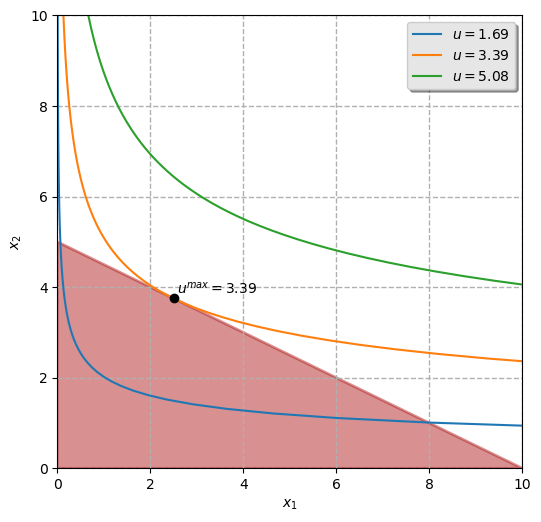

In [31]:
# a. create mette and solve her problem
mette = consumer(alpha=0.25)
mette.solve()
mette.find_indifference_curves()

# b. figure
fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(1,1,1)

mette.plot_indifference_curves(ax)
mette.plot_budgetset(ax)
mette.plot_solution(ax)
mette.plot_details(ax)

In [32]:
print(mette)

alpha = 0.250
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 2.50
 x2 = 3.75



# Saving and loading

If you close your notebook (or Python session in general) all results are lost. To start from where you stopped, you need to save your results.

## Pickling

Results can be saved and loaded by using **pickle**. All kinds of objects can be pickled.

In [33]:
# save the object "mette" (of the class consumer) in the file mette.p
pickle.dump(mette, open( "mette.p", "wb" )) # wb is writing in binary mode

In [34]:
# load the object saved in "mette.p" and call it "sofie"
sofie = pickle.load( open( "mette.p", "rb" ) ) # rb is reading in binary mode
print(sofie)

alpha = 0.250
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 2.50
 x2 = 3.75



## Saving/loading numpy arrays

Numpy data can alternatively be saved using **np.savez**

In [35]:
# save the lists of numpy arrays x1_vecs, x2_vecs
out = dict()
out['x1_vecs'] = mette.x1_vecs
out['x2_vecs'] = mette.x2_vecs
np.savez('numpydata.npz', **out)

# equivalent:
#np.savez('numpydata.npz',**{'x1_vecs': mette.x1_vecs, 'x2_vecs': mette.x2_vecs})
#np.savez('numpydata.npz',x1_vecs=mette.x1_vecs, x2_vecs=mette.x2_vecs)

The numpy data can be loaded using **np.load**

In [36]:
# a. load saved data
with np.load('numpydata.npz') as npzfile: # npzfile is a dictionary
    x1_vecs = npzfile['x1_vecs']
    x2_vecs = npzfile['x2_vecs']
    
# b. test
print(x1_vecs[0][:10]) # print first 10 elements of first vector
print(x2_vecs[0][:10])

[ 583.82735999 7995.01471612  999.37698792  296.11171478  124.92213277
   63.96013293   37.01396618   23.30908674   15.61526718   10.96710127]
[1.00000000e-08 1.01010111e-01 2.02020212e-01 3.03030313e-01
 4.04040414e-01 5.05050515e-01 6.06060615e-01 7.07070716e-01
 8.08080817e-01 9.09090918e-01]


If you need to open the data in **another program** you can save it as an **csv-file** (comma serparated file)

In [37]:
np.savetxt('numpydata.csv', mette.x1_vecs[0], delimiter=',')

**Task**: Save the x, y and z variables below using **pickle** in a file called "pickletask.p". Afterwards, load and print them.

In [38]:
x = np.linspace(0,10,11)
y = np.exp(x)
z = 'long-text-string'

In [39]:
#fillin

# a. save
pickle.dump([x,y,z], open( "pickletask.p", "wb" ))

# b. load and unpack
x_load,y_load,z_load = pickle.load( open( "pickletask.p", "rb" ) )

# c. test
print(x_load)
print(y_load)
print(z_load)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03 2.20264658e+04]
long-text-string


# Export to HTML

In [40]:
import os
os.system('jupyter nbconvert --to html "Optimize_Print_and_Plot.ipynb"')

0